In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret.classification as clf

In [3]:
mushrooms = pd.read_csv('mushroom_cleaned.csv')
print(mushrooms.info())
print(mushrooms.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB
None
   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2

In [4]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [5]:
mushrooms['class'] = mushrooms['class'].astype('str').replace({'0': 'edible', '1': 'poisonous'})
mushrooms

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,poisonous
1,1461,2,2,10,3.807467,1557,11,1.804273,poisonous
2,1371,2,2,10,3.612496,1566,11,1.804273,poisonous
3,1261,6,2,10,3.787572,1566,11,1.804273,poisonous
4,1305,6,2,10,3.711971,1464,11,0.943195,poisonous
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,poisonous
54031,82,2,3,2,1.186164,490,12,0.943195,poisonous
54032,82,5,3,2,0.915593,584,12,0.888450,poisonous
54033,79,2,3,2,1.034963,491,12,0.888450,poisonous


In [6]:
mushrooms['class'].value_counts()

class
poisonous    29675
edible       24360
Name: count, dtype: int64

In [7]:
clf1 = clf.setup(data = mushrooms, target ="class", session_id = 333, train_size=0.8)

,Description,Value
0,Session id,333
1,Target,class
2,Target type,Binary
3,Target mapping,"edible: 0, poisonous: 1"
4,Original data shape,"(54035, 9)"
5,Transformed data shape,"(54035, 9)"
6,Transformed train set shape,"(43228, 9)"
7,Transformed test set shape,"(10807, 9)"
8,Numeric features,8
9,Preprocess,True


In [8]:
best = clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9905,0.9993,0.9905,0.9905,0.9905,0.9808,0.9809,0.2570
rf,Random Forest Classifier,0.9892,0.9992,0.9892,0.9892,0.9892,0.9782,0.9782,0.4360
catboost,CatBoost Classifier,0.9883,0.9994,0.9883,0.9884,0.9883,0.9765,0.9765,4.0850
xgboost,Extreme Gradient Boosting,0.9882,0.9993,0.9882,0.9883,0.9882,0.9763,0.9763,0.0860
lightgbm,Light Gradient Boosting Machine,0.9780,0.9978,0.9780,0.9780,0.9780,0.9555,0.9555,0.2270
dt,Decision Tree Classifier,0.9752,0.9749,0.9752,0.9752,0.9752,0.9499,0.9499,0.0460
gbc,Gradient Boosting Classifier,0.8773,0.9440,0.8773,0.8774,0.8773,0.7523,0.7524,0.5290
ada,Ada Boost Classifier,0.7627,0.8283,0.7627,0.7623,0.7621,0.5188,0.5194,0.2110
knn,K Neighbors Classifier,0.7129,0.7908,0.7129,0.7129,0.7129,0.4202,0.4202,0.3470
qda,Quadratic Discriminant Analysis,0.6561,0.7195,0.6561,0.6542,0.6537,0.2990,0.3003,0.0290


In [9]:
extra_trees = clf.create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9896,0.9996,0.9896,0.9896,0.9896,0.9790,0.9790
1,0.9907,0.9996,0.9907,0.9907,0.9907,0.9813,0.9813
2,0.9924,0.9992,0.9924,0.9924,0.9924,0.9846,0.9846
3,0.9903,0.9994,0.9903,0.9903,0.9903,0.9804,0.9804
4,0.9914,0.9994,0.9914,0.9914,0.9914,0.9827,0.9827
5,0.9896,0.9990,0.9896,0.9896,0.9896,0.9790,0.9790
6,0.9898,0.9991,0.9898,0.9898,0.9898,0.9794,0.9794
7,0.9903,0.9993,0.9903,0.9903,0.9903,0.9804,0.9804
8,0.9896,0.9992,0.9896,0.9896,0.9896,0.9790,0.9790


In [10]:
# Define parameter grid for tuning Extra Trees Classifier
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],         # Function to measure the quality of a split
    'bootstrap': [True, False],               # Whether bootstrap samples are used when building trees
    'oob_score': [True, False]                # Whether to use out-of-bag samples to estimate the generalization accuracy
}

# Tune the Extra Trees Classifier model
tuned_model = clf.tune_model(extra_trees, custom_grid=param_grid, optimize='Accuracy', fold=5)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:33:27
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9899,0.9995,0.9899,0.9899,0.9899,0.9797,0.9797
1,0.9889,0.9992,0.9889,0.9889,0.9889,0.9776,0.9776
2,0.9895,0.9994,0.9895,0.9895,0.9895,0.9787,0.9787
3,0.9899,0.9993,0.9899,0.9899,0.9899,0.9797,0.9797
4,0.9883,0.9995,0.9883,0.9883,0.9883,0.9764,0.9764
Mean,0.9893,0.9994,0.9893,0.9893,0.9893,0.9784,0.9784
Std,0.0006,0.0001,0.0006,0.0006,0.0006,0.0013,0.0013


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [11]:
tuned_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=333, verbose=0,
                     warm_start=False)

In [12]:
features = clf.get_config('X_train').columns
features_score = tuned_model.feature_importances_
features_df = pd.DataFrame({'feature': features, 'score': features_score})
features_df.sort_values(by='score', ascending=False, inplace=True)
features_df

,feature,score
5,stem-width,0.175860
2,gill-attachment,0.161994
6,stem-color,0.155378
3,gill-color,0.139856
4,stem-height,0.106913
0,cap-diameter,0.106126
1,cap-shape,0.104421
7,season,0.049452


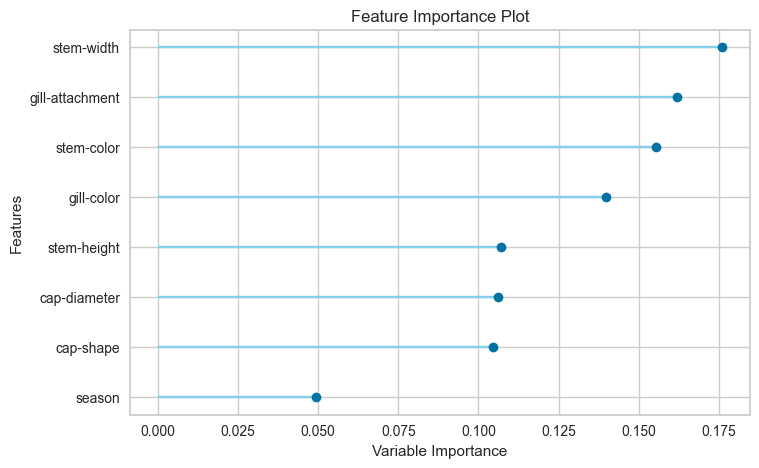

In [13]:
clf.plot_model(tuned_model, plot = 'feature')

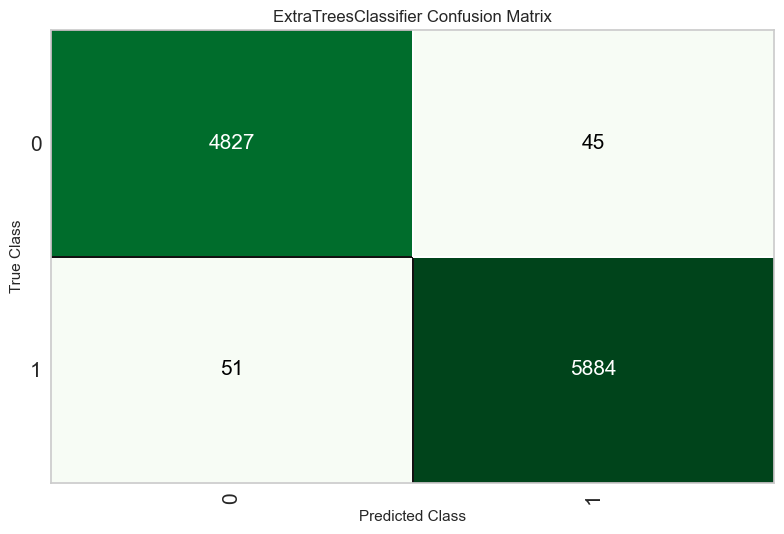

In [14]:
clf.plot_model(tuned_model, plot = 'confusion_matrix')

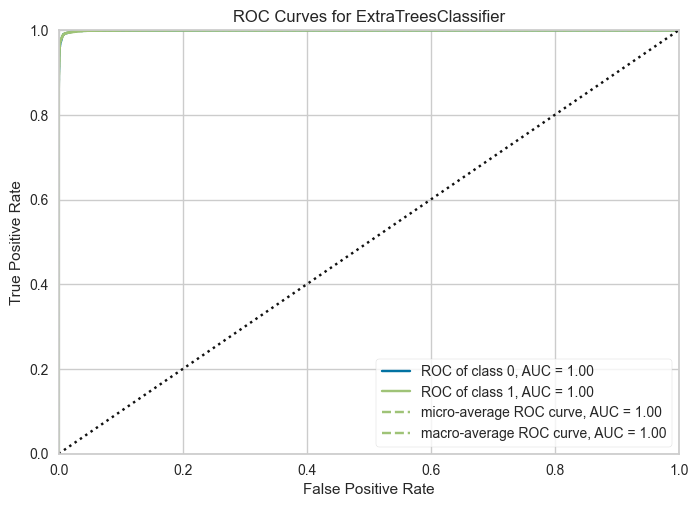

In [15]:
clf.plot_model(tuned_model, plot = 'auc')

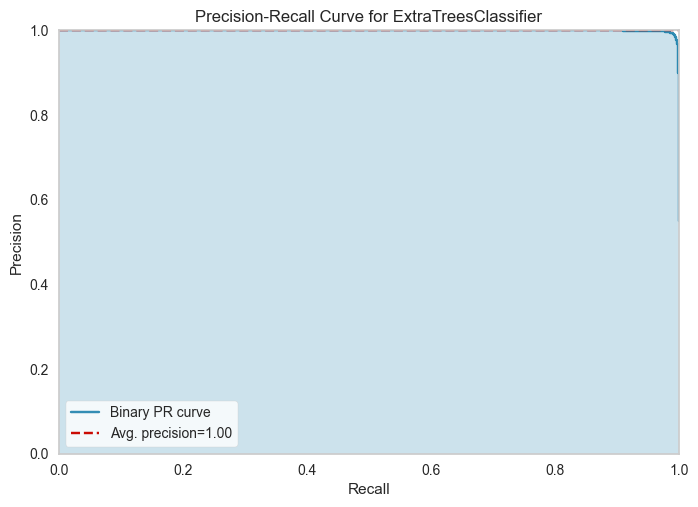

In [16]:
clf.plot_model(tuned_model, plot = 'pr')

In [17]:
clf.evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…